<a href="https://colab.research.google.com/github/losvaldote/Python_Club_for_Physicist/blob/main/Copia_de_PCP_Sesi%C3%B3n_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>


<img src="https://habrastorage.org/webt/jq/gc/r5/jqgcr5azmatev6zvgufn8xftehy.png">
    
#  **II Escuela de Verano en Física Computacional**

##Autores: [Neisser Pino R.](https://scholar.google.com.pe/citations?user=pAB28NEAAAAJ&hl=es), [Ricardo Quispe M.](https://github.com/RcrdPhysics)
##Institución: Universidad Nacional Mayor de San Marcos
##Correo: ricardo.quispe5@unmsm.edu.pe
    
Este material está sujeto a los términos y condiciones de la licencia [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Se permite el uso gratuito para cualquier propósito no comercial.

*También puede consultar la última versión de este notebook en nuestro [repositorio](https://github.com/PCPUNMSM) y los videos de clase [en nuestro canal de Youtube](https://www.youtube.com/channel/UCze8vzQLcplutz0nWDNjFCA).*
    

## Modificado por Luis Osvaldo Téllez Tovar

# <center> Sesión 4. Ecuaciones Diferenciales I
<p align="center">
  <img src="https://forum.openframeworks.cc/uploads/default/973/window_3150.jpg"  width=45% />
</p>

## Outline

1. Simbólico
2. Euler (y ejemplo)
3. Verlet
4. Problema físico


## 1. Cálculo Simbólico

## Máquina de Atwood

La longitud de la cuerda en la polea de radio $R$ estará compuesta por:

$$ x+y+\pi R = l \quad \rightarrow \quad y = -x + \pi R-l$$
Entonces obtenemos:
$$ \dot{y} = - \dot{x} $$

Siendo $x$ e $y$, longitudes de las cuerdas de $m_1$ y $m_2$.

<p align="center">
  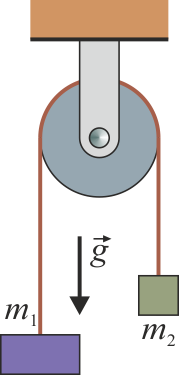
</p>


### Solución simbólica 

Importando librerías:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import sympy as sym    #Para analisis simbolico

#Para agregar el punto en la derivada temporal
import sympy.physics.mechanics as mech
mech.init_vprinting()

Estableciendo constantes:

In [ ]:
#Se definen constantes simbolicas.
#positive : TRUE especifica que las constantes son positivas.
R,m1,m2,g,L=sym.symbols('R,m_1,m_2,g,L', positive=True)

#t es la variable temporal y la variable independiente.
t=sym.symbols('t')

#x es una variable simbolica.
x=sym.Function('x')

#ecuacion de la polea
#sym.pi = 3.14159 (es el de sympy) [Correcto]
#np.pi = 3.14159 (es el de numpy)
#No mezclar bibliotecas
y=-x(t)+ (L-sym.pi*R)

Definiendo energías:

In [ ]:
# Energía cinética (T)
# x.diff(t), y.diff(t) : velocidades
#.diff(Variable independiente) : Hace referencia a la derivada.

#sym.Rational es para hacer las fracciones.
#x(t).diff(t): dx/dt
#Obs. y' = -x' >> (y')^2 = (-x')^2 = x^2

#Segunda derivada.
#x(t).diff(t,2)


T=sym.Rational(1,2)*m1*(x(t).diff(t)**2) + sym.Rational(1,2)*m2*y.diff(t)**2


T#.simplify()

In [ ]:
# Energía potencial (U)

U= -m1*g*x(t) - m2*g*y
U#.simplify()

In [ ]:
#Lagrangiano.
#Se ha definido como variable simbolica

Lagr= T-U

Lagr#.simplify()

Obteniendo así el Lagrangiano de la forma: $L(t,x,\dot x) $

**Construimos nuestra ecuación de Euler Lagrange:**

$$ \frac{\partial L}{\partial x} $$

In [ ]:
#Derivada del Lagrangiano respecto a x
#Variable.diff(variable a derivar)

rhs=Lagr.diff(x(t))

rhs  #nueva variable simbolica

$$\frac{d}{dt} \left( \frac{\partial L}{\partial \dot x} \right) $$

In [ ]:
# LAGR . diff( x(t).diff(t) ) . diff(t)
# diff.(x(t).diff(t)) dx/dt

lhs= Lagr.diff(x(t).diff(t)).diff(t)
#lhs
lhs.simplify() #Simplifica el termino

**Euler-Lagrange equation**:

$$ \frac{d}{dt} \left( \frac{\partial L}{\partial \dot x} \right) - \frac{\partial L}{\partial x} = 0$$

In [ ]:
#sym.Eq(A,B) : A = B (Simbolico)

E_L=sym.Eq(lhs,rhs)       #lhs = rhs
#E_L = sym.Eq(lhs - rhs,0)  #lhs - rhs = 0

E_L

**Finalmente resolvemos la ecuación diferencial:**

$$\ddot{x}=\frac{g(m_1-m_2)}{(m_1+m_2)}$$

Sea $$W = \frac{g(m_1-m_2)}{(m_1+m_2)}$$

Luego $$\ddot{x} = W$$

Integrando
Luego $$\frac{dx}{dt} = Wt + C_2$$

Integrando otra vez
Luego $$x(t) = \frac{1}{2}Wt^2 + C_2t + C_1$$

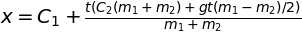

In [ ]:
#Para resolver hay que integrar dos veces
# sym.dsolve(Ecuacion) : resolver la ecuacion diferencial

g_pos = sym.dsolve(E_L) #posición general (constantes de integracion)
g_pos

**Reemplazando valores iniciales**

$$x(0)=0, \qquad \left.\frac{dx}{dt}\right|_0=0$$

In [ ]:
# Sintaxis para las condiciones iniciales : Similiutd con MATLAB, MATHEMATICA

# PRIMERA CONDICION INICIAL
# x(0) = 0 equivale x(0):0

# SEGUNDA CONDICION INICIAL
# x'(t) : sym.diff(x(t),t)
# x'(0) : sym.diff(x(t),t).subs(t,0)

# x'(0) = 0 : sym.diff(x(t),t).subs(t,0):0

ics={x(0): 0, sym.diff(x(t), t).subs(t,0): 0}

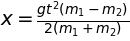

In [ ]:
# sym.dsolve(Ecuacion, condicion_inicial = condicion_inicial)

pos_eq = sym.dsolve(E_L,ics=ics) # reemplazsando condiciones iniciales
pos_eq #ecuación de posición

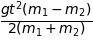

In [ ]:
# VISUALIZAR SOLO EL LADO DRERECHO (SOLUCION)

pos= pos_eq.rhs #solo la parte derecha
pos

**Reemplazando valores numéricos**

$$m_1=10, \quad m_2=5, \quad g=9.8$$

In [ ]:
# REEMPLAZADO DE VARIABLE SIMBOLICA A VALOR NUMERICO  
# (variable, valor) : consideracion independiente
# Reemplazo : funcion.subs([ (variable, valor) ])
# variable independiente : SIMBOLICO  

pos= pos.subs([(g,9.8),(m1,10),(m2,5)]) # sigue siendo una expresion simbolica
pos

In [ ]:
#  x(t) : POSICION
# dx/dt : VELOCIDAD  

vel=pos.diff(t) # EXPRESION SIMBOLICA
vel

#vel_r = round(vel,2) El round no funciona por que vel es simbolico
#vel_r 

In [ ]:
# x(t) : POSICION
#   x' : VELOCIDAD 
#  x'' : ACELERACION

#accel= vel.diff(t) # EXPRESION SIMBOLICA (Derivada de la velocidad)
accel = pos.diff(t,2) # EXPRESION SIMBOLICA (Segunda derivada de la velocidad)
accel

**Simbólico a numérico**

In [ ]:
# SYMPY (Simbolico) >> NUMPY (Numerico)

# variable_SALIDA = sym.lambdify(v_independiente, funcion, 'numpy')

# expresion simbolica a expresion numerica

#variable, expresión, librería
np_accel=sym.lambdify(t,accel,'numpy')    # ACELERACION
np_vel=sym.lambdify(t,vel,'numpy')        # VELOCIDAD
np_pos=sym.lambdify(t,pos,'numpy')        # POSICION

**Solución analítica de posición y velocidad**

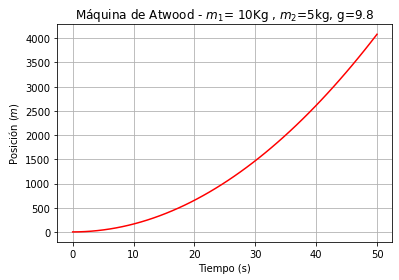

In [ ]:
# VECTOR para la variable TEMPORAL (tiempo)
tt=np.linspace(0,50)

# Evaluacion de la funcion (NUMPY) con el vector(tt)
pos_numpy=np_pos(tt)

# GRAFICA de la funcion (numpy)
plt.plot(tt,pos_numpy, color='r')

plt.xlabel('Tiempo (s)')
plt.ylabel('Posición $(m)$')
plt.title('Máquina de Atwood - $m_1$= 10Kg , $m_2$=5kg, g=9.8')
plt.grid()


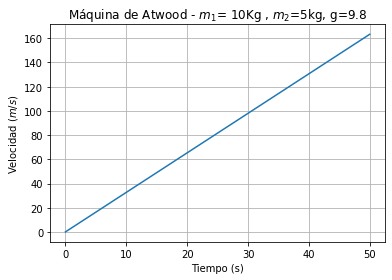

In [ ]:
# Evaluacion de la velocidad en el tiepo considerado (vecto)
vel_numpy=np_vel(tt)

# GRAFICA de la velocidad
plt.plot(tt,vel_numpy)

plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad $(m/s)$')
plt.title('Máquina de Atwood - $m_1$= 10Kg , $m_2$=5kg, g=9.8')
plt.grid()

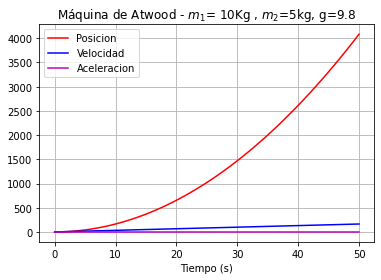

In [ ]:
# Evaluacion de las funciones en el tiempo (vector)
vel_numpy = np_vel(tt)      #VELOCIDAD
pos_numpy = np_pos(tt)      #POSICION
accel_numpy = np_accel(tt)  #ACELERACION

# Dado que la aceleracion es un numero no se puede hacer la grafica
# Hay que hacer un arreglo para ello
acela = np.ones(50)         # Vector de unos de tamaño 50
acel = accel_numpy*acela    # Vector aceleracion (constante)

# GRAFICAS
plt.plot(tt, pos_numpy, 'r')
plt.plot(tt, vel_numpy, color = 'b')
plt.plot(tt, acel, color = 'm')


plt.xlabel('Tiempo (s)')
plt.legend(['Posicion', 'Velocidad', 'Aceleracion'])
plt.title('Máquina de Atwood - $m_1$= 10Kg , $m_2$=5kg, g=9.8')
plt.grid()

## 2. Método de Euler

### Problema bien planteado

El problema de valor inicial:

$$\frac{dy}{dt}=f(t,y), \qquad a\leq t\leq b, \qquad y(a)=\alpha,$$

Se dice que es un **problema bien planteado** si:



1.   Existe una única, y(t), y
2.   Existen constante $\epsilon \gt 0$ y $k \gt 0$, tales que para cualquier $\epsilon$ en $(0,\epsilon_0)$, siempre que $\delta(t)$ es continua con $|\delta(t)|\lt \epsilon$ para todo t en $[a,b]$ y cuando $|\delta_0|\lt \epsilon$, el problema de valor inicial

$$\frac{dz}{dt}=f(t,z)+\delta(t), \qquad a \leq t \leq b, \qquad z(a)  =\alpha + \delta_0 $$

tiene una única solución $z(t)$ que satisfac e

$$|z(t)-y(t)|\lt k\epsilon$$

para todo $t$ en $[a,b]$.


### Método

El objetivo del método de Euler es obtener aproximaciones para el problema de valor inicial bien planteado:

$$\frac{dy}{dt}=f(t,y), \qquad a\leq t\leq b, \qquad y(a)=\alpha \qquad \qquad (1)$$


No se obtendrá una aproximación continua a la solución $y(t)$; en su lugar, las aproximaciones se generarán para varios valores llamados **puntos de malla** en el intervalo $[a,b]$.

Una vez que se obtiene la solución aproximada en los puntos, la solución aproximada en otros puntos en el intervalo se puede encontrar a través de interpolación.

primero estipulamos que los puntos de ma ya están Igualmente espaciados a lo largo del intervalo $[a,b]$. Esta copndición se garantiza al seleccionar un entero positivo $N$, al establecer $h=(b-a)/N$, y seleccionar los puntos de malla

$$t_i=a+ih, \qquad i=0,1,2,..,N.$$

Usaremos el teorema de Taylor para deducir el método de Euler para deducir el método de Euler. Suponga que $y(t)$, la única solución, tiene dos derivada continuas en $[a,b]$, de tal forma que cada $i=0,1,2,...,N-1$.

$$y(t_ {i+1})=y(t_i)+(t_{i+1}-t_i)y'(t_i)+\frac{(t_{i+1}-t_i)^2}{2}y''(\xi_i),$$

y ya que $y(t)$ satisface la ecuación (1).

$$y(t_{i+1})=y(t_i)+hf(t_i,y(t_i))+\frac{h^2}{2}y''(\xi_i)$$

El método de Euler es 

$$w_0=\alpha$$

$$w_{i+1}=w_i +hf(t_i,w_i), \qquad i =0,1,...,N-1$$

In [ ]:
# Algoritmo EULER : EDO  
# f  : funcion de la EDO : y' = f(x,y)
# x0 : punto inicial del dominio
# xn : punto final del dominio
# y0 : condicion inicial en x0
# n  : numero de pasos 

# CONVERGENCIA DE LA SUCESION (Metodos numericos)
def euler(f,x0,xn,y0,n):
    
    h = (xn-x0)/n # tamaño de paso (Dominio)

    x0_l=[] # lista de pasos (dominio)
    yn_l=[] # lista de soluciones (funcion)

    for i in range(n):  # bucle de iteraciones

        slope = f(x0, y0)    # f(x,y) en datos iniciales 
        yn = y0 + h * slope  # algoritmo de EULER

        y0 = yn              # actualiza el yn (la solución) [RECURSIVA]
        x0 = x0+h            # actualiza el paso

        x0_l.append(x0)      # almacenando el valor en la LISTA (Dominio)
        yn_l.append(y0)      # almacenando el valor en la LISTA (Solucion)
    
    return(yn_l)             #devuelve la solucion numerica para cada n-esimo paso

### Ley de enfriamiento de Newton

Ley que describe como un objeto con una temperatura inicial  $T(t_0)=T_0$ es enfriado en una temperatura ambiente $T_R$

$$\frac{dT(t)}{dt}=-k\Delta T =-k(T(t)-T_R)$$

$\frac{dT(t)}{dt}$ nos dice la taza de enfriamiento de un objeto es proporcional a la diferencia de temperaturas.

Cuya solución analítica es: 

$$T(t)=T_R+(T(0)-T_R)e^{-kt}$$

Vamos a verificar la solución analítica desde SymPy:

In [ ]:
Tr,t,k,T0 = sym.symbols('T_R, t,k,T_0')
Tt = sym.Function('T')
dTdt = Tt(t).diff(t)
expr2 = sym.Eq(dTdt, -k*(Tt(t)-Tr))
expr2

In [ ]:
sym.dsolve(expr2)

In [ ]:
ics2={Tt(0): T0}
Eq_sol=sym.dsolve(expr2,ics=ics2) # Igualdad
sol=Eq_sol.rhs #solo la expresión de la solución
sol

Queda demostrado.

In [ ]:
# VALORES DE LAS CONSTANTES
# k=0.07      TASA DE ENFRIAMIENTO 
# T_R=20°C    TEMPERATURA DEL MEDIO

# ecuacion diferencial de NEWTOn 
def newtoncooling(time, temp):
	return -0.07 * (temp - 20)
 
# SOLUCION ANALITICA
def newtoncooling_ana(t,TR=20,T0=100,k=0.07):
  return TR+(T0-TR)*np.exp(-k*t) #TR Temperatura de entorno

In [ ]:
# VALOR DEL TIEMPO (Dominio)
a=0
b=100 #segundos 

# NUMERO DE DATOS
N1=10 
N2=100
N3=1000

# TAMAÑO DEL PASO
h1=(a-b)/N1
h2=(a-b)/(N2) 
h3=(a-b)/(N3)

# VECTOR DOMINIO (Tiempo)
t_T=np.linspace(a,b,N3) #tiempo para las temperaturas
#t_T=np.linspace(a,b,N2)
#t_T=np.linspace(a,b,N1)

#Temp_1= euler(newtoncooling,a,b,100,N1)
#Temp_2= euler(newtoncooling,a,b,100,N2)
Temp_3= euler(newtoncooling,a,b,100,N3)

# solucion ananlitica NEWTON
Temp_ana=newtoncooling_ana(t_T)

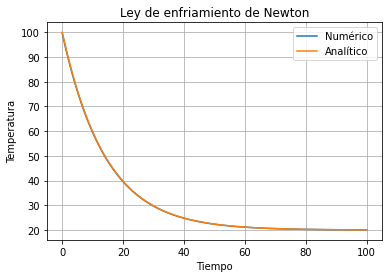

In [ ]:
fig = plt.figure()

# GRAFICA DE LAS APROXIMACIONES (EULER)
#plt.plot(t_T,Temp_1)
#plt.plot(t_T,Temp_2, '--')
plt.plot(t_T,Temp_3)

# GRAFICA DE LA SOLUCION ANALITICA
plt.plot(t_T,Temp_ana)

plt.legend(["Numérico", "Analítico"])
plt.xlabel('Tiempo')
plt.ylabel('Temperatura')
plt.title('Ley de enfriamiento de Newton')
plt.grid()
plt.show() 

**MODELAMIENTO MATEMATICO**

Modelos (Ecuaciones Diferenciales)

**Ordinaria**, Parcial, Retardo, Estocastica, Impulsiva

1. Tipo Lineal    : Solucion ANALITICA
2. Tipo NO Lineal : Dificilmente (casi nunca) se encuentra su Solucion Analitica.

**METODO NUMERICO (Soluciones Aproximadas)**

Realizar operaciones (algoritmo) : converja a un punto. No tienen una nocion hacia donde esta convergiendo.

**ANALISIS CUALITATIVO (Comportamiento de las soluciones)**

Buscar cuando los parametros utilizados logran estabilizar el modelo (estado estacionario). Tiene un enfoque en el truncamiento del Polinomio de Taylor (Equivalencia topologica entre una Ecuacion No Lineal y una "ecuacion lineal"). 

## 3. Método de Verlet

##### El problema de valor inicial (de segundo orden):

\begin{equation}
\left\{
	       \begin{array}{ll}
		 y'' = F(y) \\
		 y(0) = \alpha \\
         y'(0) = \beta
	       \end{array}
	     \right.
\end{equation}

##### se discretiza de manera similar al método de Euler y luego se aplica el siguiente algoritmo (*la deducción de este algoritmo se realiza truncando series de Taylor hacia adelante y hacia atras de $F(y)$*):

\begin{equation}
\left\{
	       \begin{array}{ll}
		 y_0 = \alpha \\
		 y_{-1} = y_0 - \beta \Delta x + \frac{1}{2}F(y_0)\Delta x^2 \\
         y_{i+1} = 2 y_i -y_{i-1} + F(y_i)\Delta x^2
	       \end{array}
	     \right.
\end{equation}

**Obs.** Ecuaciones de segundo orden (no interviene la variable independiente).
>> Ecuacion de orden **n** se puede expresar como un sistema de ecuaciones de primer orden

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# f     : funcion de la EDO
# a     : condicion inicial de la EDO
# xf    : Punto final del dominio 
# niter : numero de iteraciones

# pow(r,q) : 'r' elevado a la 'q'

def verlet(f,a,b,xf,niter):
    dx = xf/(niter-1) # Variación de x (discretizacion)

    xs = np.arange(0,xf+dx,dx) # vector 0 hasta xf
    ys = np.zeros(np.size(xs)) # vector de veros (tamaño xs)

    yinit = a-dx*b+0.5*dx*dx*f(a) # paso de arranque

    ys[0] = yinit # primer elemento del vector SOLUCION
    ys[1] = a     # segundo elemento del vectro SOLUCION (Condicion del problema)

    for i in range(1,niter-1): # bucle de iteraciones

        ys[i+1] = 2*ys[i]-ys[i-1]+f(ys[i])*pow(dx,2) # vector de la SOLUCION

    return xs, ys


#### Solución a un problema de caida libre:
##### Se suelta un objeto (inicialmente en reposo) desde una altura de $100$ m.

\begin{equation}
\left\{
	       \begin{array}{ll}
		 y'' = -g \\
		 y(0) = 100 \\
         y'(0) = 0
	       \end{array}
	     \right.
\end{equation}

Text(0.5, 0, 'Tiempo')

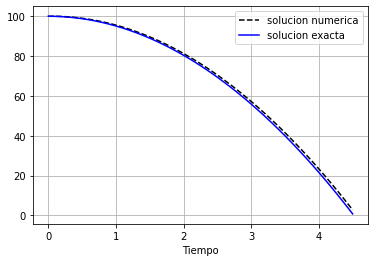

In [ ]:
# Solucion de un problema de caida libre

# Funcion de la EDO (para este caso particular es constante)
def f(y):
    return -9.8
###################################################
# Punto referencial (Verlet)
pos0 = 4.5

# Algoritmo de Verlet
# a = 100    : condicion inicial
# b = 0      : tiempo inicial (Dominio)
# pos0 = 4.5 : valor referencial Verlet (Retardo)
# n = 10     : numero de iteraciones 

t, y = verlet(f,100.0,0.0,pos0,100)
###################################################

# EULER aqui no sirve porque esta hecho para primer orden y 
# este caso es de segundo orden
#ws = euler(f, 0, 4.5, 100, 100) 

# SOLUCION EXACTA
def sol_ex(t):
    return 100 -9.8/2.0*pow(t,2)

# CONSIDERACIONES : Dominio y Solucion
t_ex = np.arange(0.0,pos0+0.1,0.1) # vector temporal
y_ex = np.zeros(np.size(t_ex))     # Solucion (tiempo)

# evaluar la solucion (tiempo) en el dominio
for i in range(np.size(t_ex)):
    y_ex[i] = sol_ex(t_ex[i])  # solucion exacta (tiempo)

plt.plot(t,y,'k--',label = 'solucion numerica')
plt.plot(t_ex,y_ex,'b',label = 'solucion exacta')
plt.legend()
plt.grid()
plt.xlabel('Tiempo')

Solución a un problema oscilador lineal vs no-lineal:

\begin{equation}
\left\{
	       \begin{array}{ll}
		 y'' = -\sin(y) \sim -y \\
		 y(0) = \theta_0 \\
         y'(0) = 0
	       \end{array}
	     \right.
\end{equation}

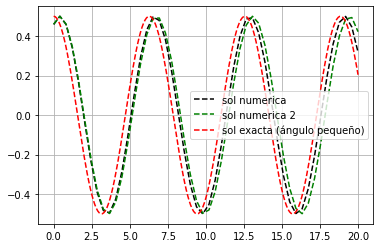

In [ ]:
# solucion de un problema de oscilador lineal vs oscilador no-lineal
# Se va a usar el algoritmo de VERLET

def f2(y):
    return -y

def f3(y):
    return -np.sin(y)
##########################

tfinal = 20.0
npuntos = 50
ang_init = 0.5    # angulo pequeño \theta_0
#ang_init = 2.5

t2, y2 = verlet(f2,ang_init,0.0,tfinal,npuntos) # VERLET : y' = -y
t3, y3 = verlet(f3,ang_init,0.0,tfinal,npuntos) # VERLET : y' = -sin(y)

# Condiciones del vector dominio y solucion
t_ex2 = np.arange(0.0,tfinal+0.1,0.1)
y_ex2 = np.zeros(np.size(t_ex2))

for i in range(np.size(t_ex2)):
    y_ex2[i] = ang_init*np.cos(t_ex2[i])

# GRAFICA DE LAS SOLUCIONES 
plt.plot(t2,y2,'k--',label='sol numerica')
plt.plot(t3,y3,'g--',label='sol numerica 2')
plt.plot(t_ex2,y_ex2,'r--',label = 'sol exacta (ángulo pequeño)')
plt.legend()
plt.grid()
plt.show()


## Problema físico

### Pelota que rebota

En este artículo estamos resolviendo el problema de la pelota que rebota con el integrador más simple de todos: el esquema de Euler hacia adelante.

Tenemos que resolver la *EDO de segundo orden* (ecuaciones de movimiento de Newton con aceleración constante)

$$
\frac{d^2 y}{dt^2} = -g
$$

donde $ g $ es la aceleración constante debida a la gravedad y $ y (t) $ es la posición de la pelota en función del tiempo (su
trayectoria).

El esquema de Euler hacia adelante para cualquier *EDO de primer orden*

$$ \frac{dy}{dt} = f(y, t) $$

es

$$ y(t + h) = y(t) + h f(y(t), t). $$

Para resolver la ecuación de movimiento original de segundo orden, hacemos uso del hecho de que una EDO de $ n $ -ésimo orden puede escribirse como $ n $ EDO acopladas de primer orden, a saber

$$
\begin{align}
\frac{dy}{dt} &= v\\
\frac{dv}{dt} &= -g.
\end{align} $$

Resuelva cada una de las EDO de primer orden con el algoritmo de Euler:

$$
\begin{align}
y(t + h) &= y(t) + h v(t)\\
v(t + h) &= v(t) - h g.
\end{align} $$


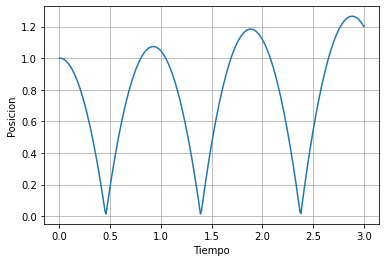

In [ ]:
# Utilice el método de Euler para calcular la trayectoria de un rebote
# bola asumiendo una reflexión perfecta en la superficie x = 0.
# Utilice unidades SI (metros y segundos)

steps = 300     # número de pasos de tiempo calculados
endtime = 3.0   # fin de la simulación
g = 9.8         # gravedad

# crear matrices 1D de pasos de longitud +1 para tiempo (t), posición (x), velocidad (v)

t = np.zeros(steps+1)  # vector TIEMPO
x = np.zeros(steps+1)  # vector POSICION
v = np.zeros(steps+1)  # vector VELOCIDAD

# inicializar variables en el tiempo = 0.0
# Condicion inicial del sistema
x[0] = 1.0
v[0] = 0.0
t[0] = 0.0

dt = endtime / float(steps) # tamaño de paso (tiempo inicial = 0)

# BUCLE para las iteraciones
for i in range (steps):
   t[i+1] = t[i] + dt        # calcular el vector TIEMPO
   x[i+1] = x[i] + v[i]*dt   # calcular el vector POSICION
   v[i+1] = v[i] - g*dt      # calcular el vector VELOCIDAD
   if x[i+1] < 0.0:    #si la bola esta debajo de la superficie, reflajala
      x[i+1] = -x[i+1]
      v[i+1] = -v[i+1]

# GRAFICA TIEMPO VS POSICION
plt.plot(t, x)
plt.grid()
plt.xlabel('Tiempo')
plt.ylabel('Posicion')
plt.show()


In [ ]:
def bouncingBall(g: 'gravity value of g(m/s2)',
                 y: 'vertical position',
                 v: 'velocity',
                 t: 'time',
                 dt: 'time step',
                 y_floor: 'floor position',
                 e: 'Coefficient of restitution',
                 interval: 'time interval',
                 title: 'name of experiment'):    
   
    data = []   # vector vacio (almacenar datos)
    
    while t < interval:   # tiempo < intervalo
        y += v*dt         # posicion aumentada por la velocidad
        if y > y_floor:   # posicion > posicion suelo
            v += g*dt     # velocidad es aumentada por el tiempo (gravedad)
        else:
            v=-e*v # rebotar en el suelo con Coeficiente de restitución - COR

        data.append([t, y, v])  # almacenar los datos
        t += dt                 # incremento del tiempo
    
    data = np.array(data).transpose()  # matriz transpuesta de DATA

    # GRAFICA
    # data[0] : tiempo
    # data[1] : posicion
    # data[2] : velocidad

    plt.plot(data[0], data[1])
    plt.title(title)
    plt.xlabel("time (s)")
    plt.ylabel("position (m)")
    plt.grid()

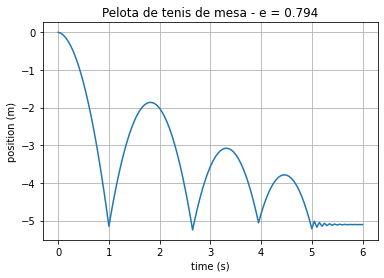

In [ ]:
bouncingBall(-9.81, 0, 0, 0, 0.05, -5, 0.794, 6, "Pelota de tenis de mesa - e = 0.794")

Rango de valores para $e$ (Coeficiente de resitución) - tratado como una constante

$e$ es ser un número real positivo entre 0 y 1:

$e = 0$: esta es una colisión perfectamente inelástica. Esto significa que la energía cinética a lo largo de la normal común es 0. La energía cinética se convierte en calor o en el trabajo realizado para deformar los objetos.

$0 <e <1$: Ésta es una colisión inelástica del mundo real, en la que se disipa algo de energía cinética.

$e = 1$: Se trata de una colisión perfectamente elástica, en la que no se disipa energía cinética y los objetos rebotan entre sí con la misma velocidad relativa con la que se acercaron.

$e <0$: Un COR menor que cero representaría una colisión en la que la velocidad de separación de los objetos tiene la misma dirección (signo) que la velocidad de cierre, lo que implica que los objetos se atraviesan entre sí sin engancharse completamente. Esto también puede considerarse como una transferencia incompleta de impulso. Un ejemplo de esto podría ser un objeto pequeño y denso que atraviesa uno grande y menos denso, por ejemplo, una bala que atraviesa un objetivo, una motocicleta que atraviesa una casa rodante o una ola que atraviesa una presa.

$e> 1$: Esto representaría una colisión en la que se libera energía, por ejemplo, las bolas de billar de nitrocelulosa pueden literalmente explotar en el punto de impacto. Asimismo, algunos artículos recientes han descrito colisiones superelásticas en las que se argumenta que el COR puede tomar un valor superior a uno en un caso especial de colisiones oblicuas456. Estos fenómenos se deben al cambio de trayectoria de rebote provocado por la fricción. En tal colisión, la energía cinética aumenta de manera que la energía se libera en algún tipo de explosión. Es posible que $e = ∞$ para una explosión perfecta de un sistema rígido.

# 7. Resumen

*   SymPy llega a ser una librería bastante eficiente para resolver analíticamente PVI en EDOs, tiene una amplia gamma de funciones y una comunidad científica trabajando en ello
*   El método de Euler es un método sencillo de implementar, pero de bajo orden.
*   Tiene errores cuando la pendiente instantánea cambia rápidamente dentro de la $\Delta x$.
*   El algoritmo de Verlet es particularmente apropiado en las situaciones en que la expresión de la segunda derivada solo es función de las variables, dependiente o independiente, sin participar la primera derivada. Este es el caso de numerosos problemas de la dinámica newtoniana, por lo que se emplea frecuentemente en astronomía y mecánica molecular.

## 8. Recursos útiles
* ["Documentación de SymPy"](https://docs.sympy.org/latest/index.html)
* ["Ejemplos avanzados de SymPy"](https://www.youtube.com/watch?v=r4piIKV4sDw)
* ["Métodos Numéricos con Python"](https://github.com/pachocamacho1990/MetNum_Py)
* ["La bola que rebota"](https://www.kaggle.com/gzstoyanov/the-bouncing-ball)
* ["Algoritmo de Verlet"](https://es.wikipedia.org/wiki/Integración_de_Verlet)
* Eric Ayars , 'Computational Physics with Python" (libro completo [aquí](https://belglas.files.wordpress.com/2018/03/cpwp.pdf))
* ["How to Think Like a Computer Scientist"](https://nbviewer.jupyter.org/github/Yorko/mlcourse.ai/blob/master/jupyter_english/tutorials/merging_dataframes_tutorial_max_palko.ipynb) - Think Python Versión 2.0.17 by Allen Doney. (libro completo [aquí](https://www.greenteapress.com/thinkpython/thinkpython.pdf))
* L. Verlet, Computer experiments on classical fluids. I. Thermodynamical properties of Lennard-Jones molecules, Physical Review 159, 98 (1967)
* Richard L. Burden, 'Analisis Numerico', 10ma Edición


## Donaciones
<br>
<center>
Puedes donar una vez en el siguiente enlace (Ko-Fi):

<br>
    
*Click en la imagen.*

<a href="https://ko-fi.com/rcrdphysics">
<img src="https://habrastorage.org/webt/8r/ml/xf/8rmlxfpdzukegpxa62cxlfvgkqe.png" width=20% />

</center>